In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.layers import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

In [0]:
(X_Train,_),(_,_) = mnist.load_data()

In [32]:
X_Train = (X_Train.astype('float32')-127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [33]:
X_Train  = X_Train.reshape(-1,28*28)
print(X_Train.shape)

(60000, 784)


In [0]:
EPOCHS = 60
BATCH_SIZE = 256
NOISE_DIM = 100
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE)

In [0]:
HALF_BATCH_SIZE = 128
NOISE_DIM = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [0]:
adam = Adam(lr=2e-4,beta_1 = 0.5)

In [37]:
# Generator
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

# Compile
generator.compile(loss='binary_crossentropy',optimizer=adam)

generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 784)               803600    
Total para

In [38]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Combined Model (Geneerator + Discriminator) -> Functional API
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generator_output = generator(gan_input)
gan_output = discriminator(generator_output)

model = Model(input=gan_input,output=gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 533505    
Total params: 2,019,857
Trainable params: 1,486,352
Non-trainable params: 533,505
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


In [0]:
def showImgs(epoch):
    noise = np.random.normal(0,1,size=(100,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(-1,28,28)
    
    #Display the Images
    plt.figure(figsize=(10,10))
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],cmap='gray',interpolation='nearest')
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    plt.savefig("images/gan_output_{0}.png".format(epoch+1))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 D Loss 150.6493 G loss 223.2612 


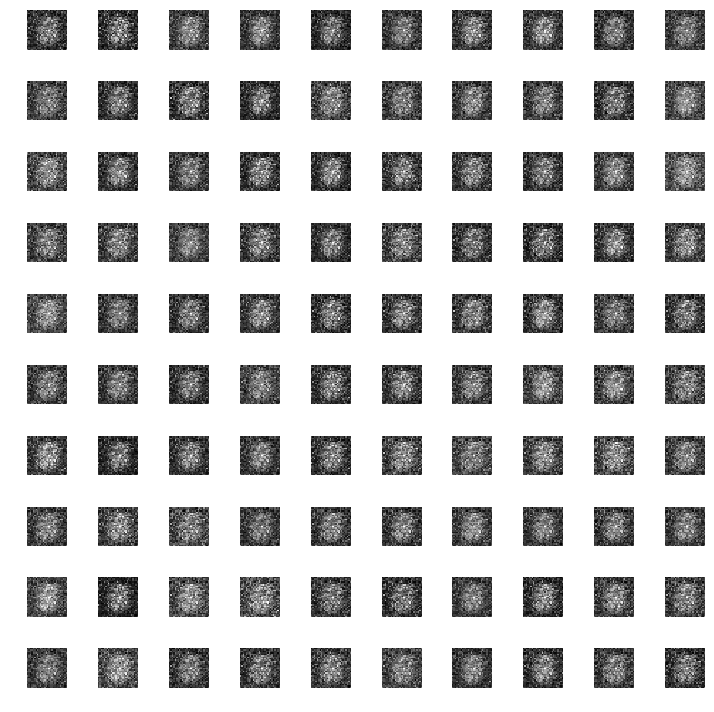

Epoch 2 D Loss 150.1799 G loss 238.1048 
Epoch 3 D Loss 151.4594 G loss 248.1284 
Epoch 4 D Loss 145.3038 G loss 264.4881 
Epoch 5 D Loss 141.3101 G loss 268.6004 
Epoch 6 D Loss 137.2204 G loss 293.0341 


<Figure size 432x288 with 0 Axes>

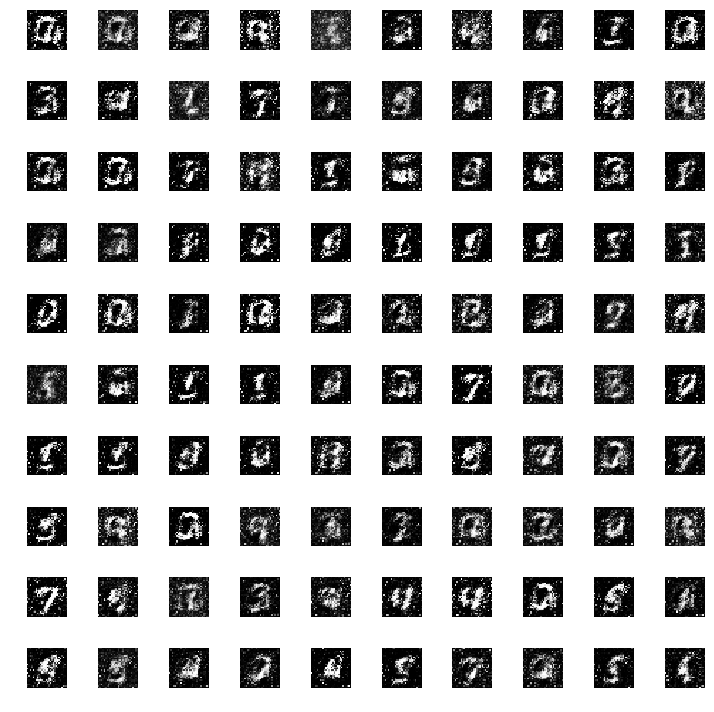

Epoch 7 D Loss 136.3330 G loss 292.9913 
Epoch 8 D Loss 136.0580 G loss 288.2087 
Epoch 9 D Loss 141.5665 G loss 271.2410 
Epoch 10 D Loss 147.6274 G loss 251.9588 
Epoch 11 D Loss 149.0444 G loss 246.9562 


<Figure size 432x288 with 0 Axes>

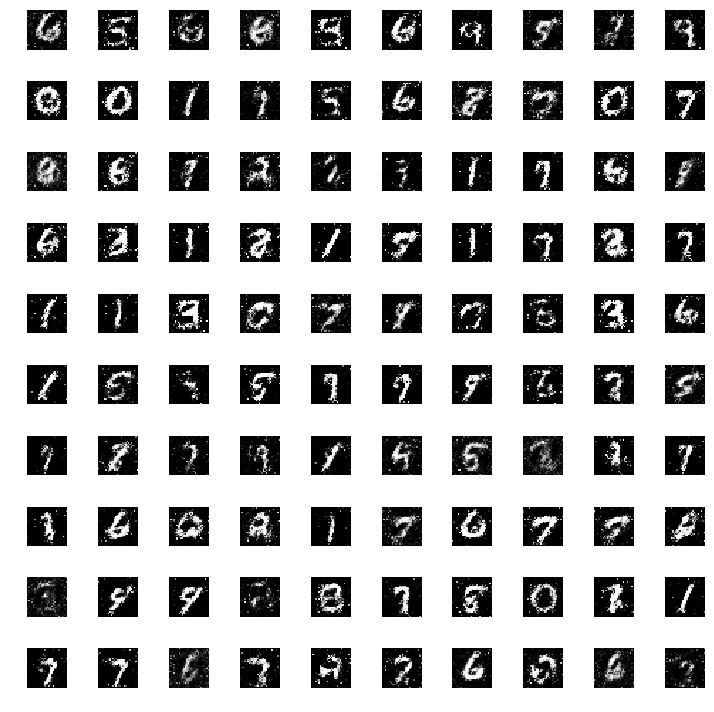

Epoch 12 D Loss 147.1922 G loss 249.4802 
Epoch 13 D Loss 148.8800 G loss 243.8204 
Epoch 14 D Loss 150.3556 G loss 238.3828 
Epoch 15 D Loss 150.9790 G loss 238.2353 
Epoch 16 D Loss 150.8369 G loss 237.1114 


<Figure size 432x288 with 0 Axes>

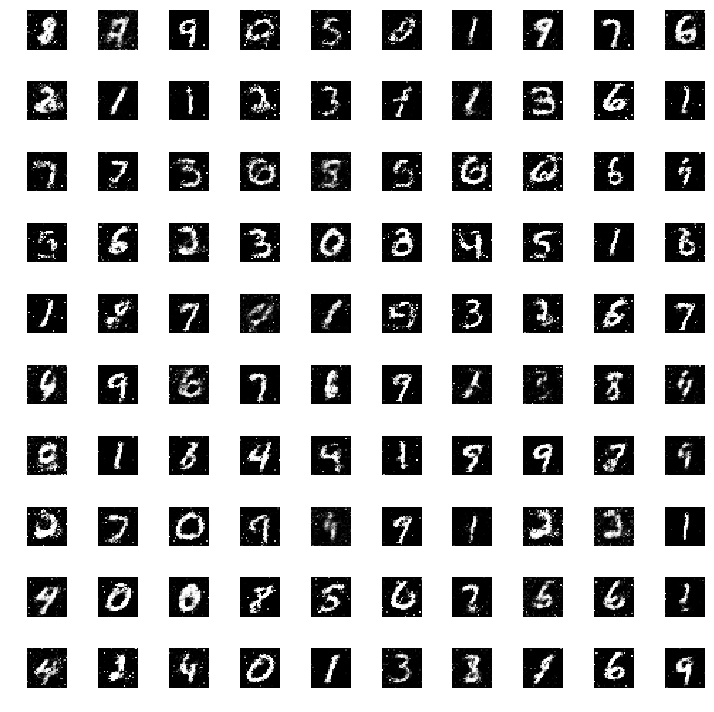

Epoch 17 D Loss 150.5521 G loss 239.2131 
Epoch 18 D Loss 150.9220 G loss 238.3699 
Epoch 19 D Loss 151.8432 G loss 238.8977 
Epoch 20 D Loss 152.3862 G loss 236.8563 
Epoch 21 D Loss 152.9995 G loss 236.3387 


<Figure size 432x288 with 0 Axes>

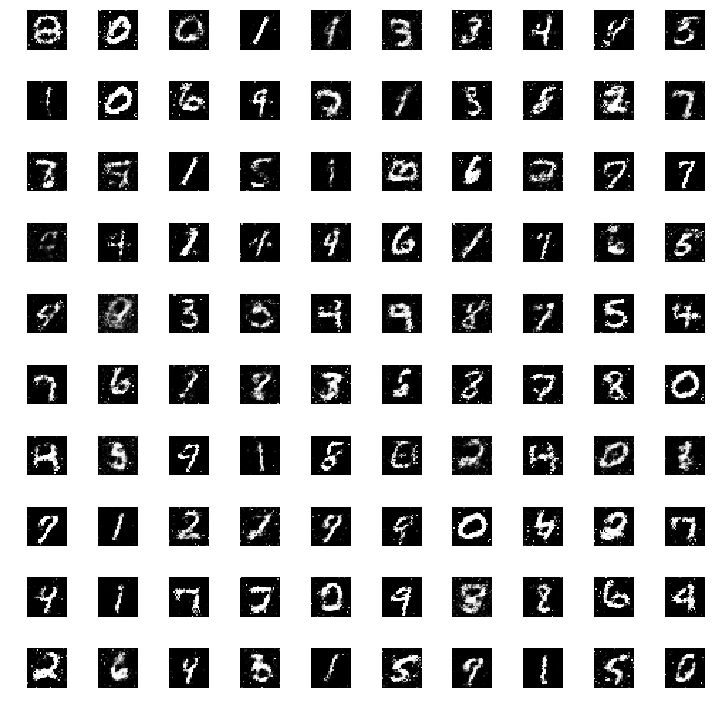

Epoch 22 D Loss 152.9123 G loss 234.2154 
Epoch 23 D Loss 153.1864 G loss 235.8465 
Epoch 24 D Loss 153.8668 G loss 233.7409 
Epoch 25 D Loss 154.3338 G loss 232.4447 
Epoch 26 D Loss 155.0693 G loss 229.6702 


<Figure size 432x288 with 0 Axes>

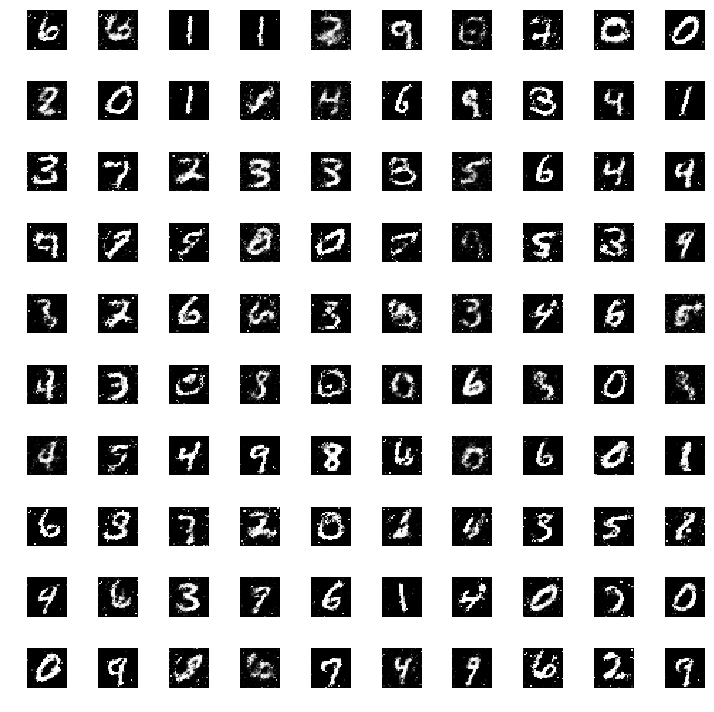

Epoch 27 D Loss 155.2898 G loss 229.3669 
Epoch 28 D Loss 155.6392 G loss 229.2034 
Epoch 29 D Loss 155.6716 G loss 228.8581 
Epoch 30 D Loss 156.0759 G loss 227.5669 
Epoch 31 D Loss 155.3518 G loss 229.7778 


<Figure size 432x288 with 0 Axes>

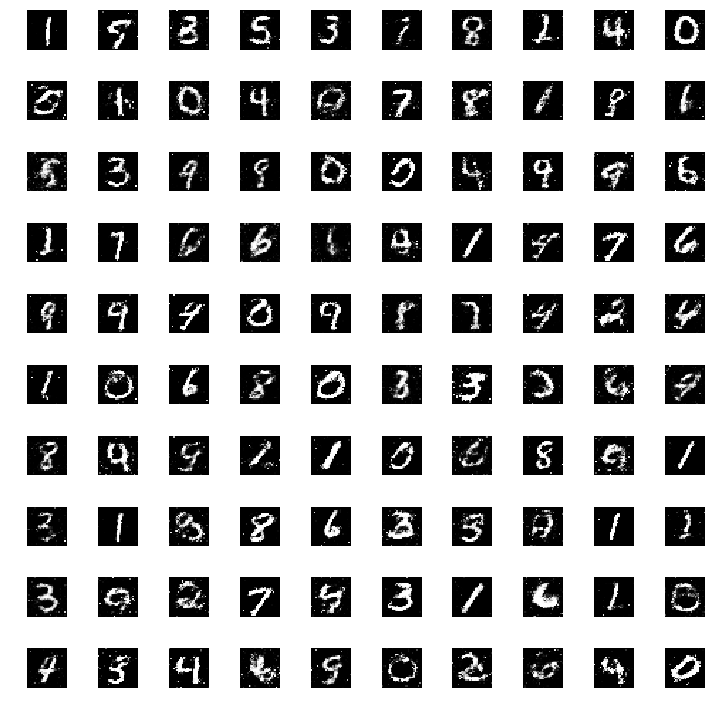

Epoch 32 D Loss 155.7811 G loss 228.3219 
Epoch 33 D Loss 156.2066 G loss 227.3090 
Epoch 34 D Loss 156.0648 G loss 228.8286 
Epoch 35 D Loss 156.2030 G loss 228.1851 
Epoch 36 D Loss 155.7615 G loss 228.2350 


<Figure size 432x288 with 0 Axes>

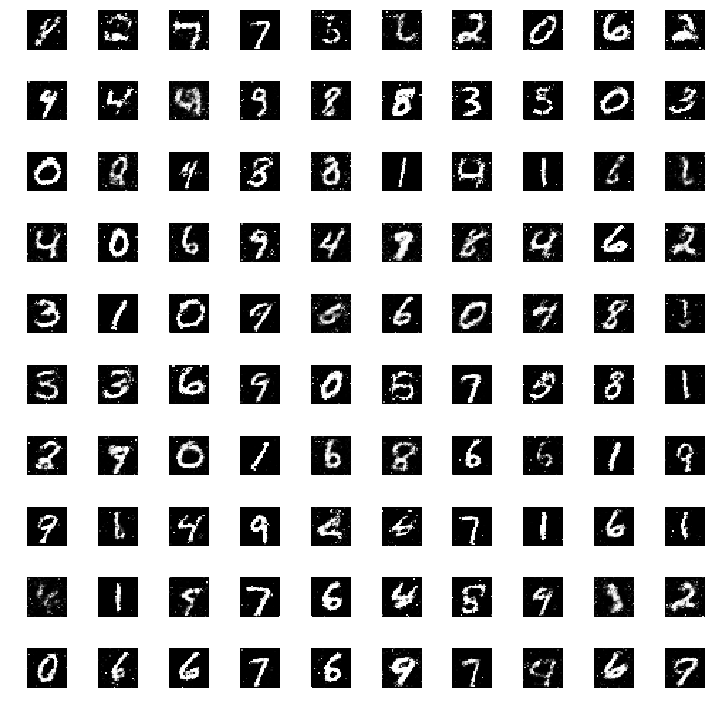

KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [41]:
d_losses = []
g_losses =  []

# Training Loop
for epoch in range(EPOCHS):
    epoch_d_loss = 0.0
    epoch_g_loss = 0.0
    
    # Mini Batch
    for step in range(NO_OF_BATCHES):
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate fake images assuming generator is frozen
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        # Labels
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        #Train on Real and Fake Images
        d_real_loss = discriminator.train_on_batch(real_imgs,real_y)
        d_fake_loss = discriminator.train_on_batch(fake_imgs,fake_y)
        
        d_loss = 0.5*d_real_loss + 0.5*d_fake_loss
        epoch_d_loss += d_loss
        
        # Train Generator
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)
        
    print("Epoch %d D Loss %.4f G loss %0.4f "%((epoch+1),epoch_d_loss,epoch_g_loss))
    if (epoch%5)==0:
        generator.save("images/gen_{0}.h5".format(epoch))
        showImgs(epoch)
        
        
        

In [0]:
!mkdir images
!mkdir model

In [17]:
!ls

gen_0.h5  images  model  sample_data


In [42]:
!zip -r images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_11.png (deflated 83%)
  adding: content/images/gen_30.h5 (deflated 8%)
  adding: content/images/gen_10.h5 (deflated 8%)
  adding: content/images/gan_output_26.png (deflated 83%)
  adding: content/images/gen_35.h5 (deflated 8%)
  adding: content/images/gen_20.h5 (deflated 8%)
  adding: content/images/gen_0.h5 (deflated 8%)
  adding: content/images/gan_output_1.png (deflated 83%)
  adding: content/images/gan_output_21.png (deflated 83%)
  adding: content/images/gan_output_31.png (deflated 83%)
  adding: content/images/gen_25.h5 (deflated 8%)
  adding: content/images/gan_output_36.png (deflated 83%)
  adding: content/images/gan_output_6.png (deflated 83%)
  adding: content/images/gan_output_16.png (deflated 83%)
  adding: content/images/gen_5.h5 (deflated 8%)
  adding: content/images/gen_15.h5 (deflated 8%)


In [43]:
!ls

gen_0.h5   gen_15.h5  gen_25.h5  gen_5.h5  images.zip  sample_data
gen_10.h5  gen_20.h5  gen_30.h5  images    model


In [45]:
from google.colab import files
files.download('images.zip')

KeyboardInterrupt: ignored

'/content'